In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

#from matplotlib.path import Path
#import cartopy.crs as ccrs
#from cartopy.io.img_tiles import MapQuestOSM

import cartopy

In [2]:
#https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry
df = pd.read_csv('../data/SFPD_Incidents_-_from_1_January_2003.csv', index_col='IncidntNum', parse_dates=['Date'])
df = df[df.Y<90]

In [194]:
df_clean = df[df.Address != '800 Block of BRYANT ST'] #this is a police station?
df_clean = df_clean[df_clean.Category != 'NON-CRIMINAL'] #forget about car non criminal reports.
df_clean = df_clean[df_clean.Category != 'OTHER OFFENSES'] #forget about car non criminal reports.

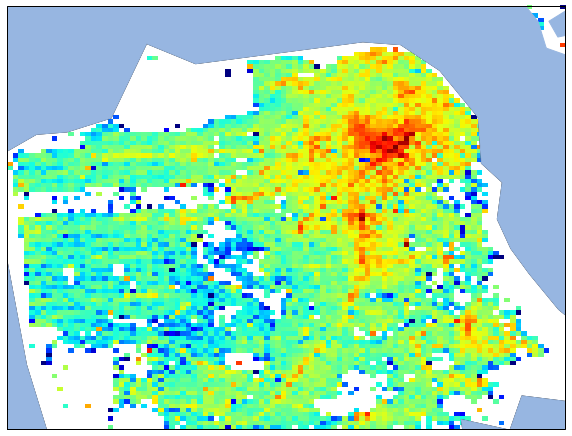

In [195]:
from matplotlib.colors import LogNorm

ax = plt.axes(projection=cartopy.crs.PlateCarree())

COASTLINE = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '10m', edgecolor='black', facecolor='none')
OCEAN     = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '10m',
                            edgecolor='face',
                            facecolor=np.array((152, 183, 226)) / 256)
ax.add_feature(COASTLINE)
ax.add_feature(OCEAN)
ax.set_extent([-122.52, -122.35, 37.70, 37.835])

tmp = df_clean#[df_clean.Category== 'ASSAULT']
plt.hist2d(tmp.X, tmp.Y,bins=100, norm=LogNorm())#, alpha=0.75)
#plt.colorbar()
#tmp.plot(x='X', y='Y', kind='hexbin', ax=ax, gridsize=(100,100))#, alpha=0.75)


plt.show()

In [92]:
df_lv = pd.read_csv('../data/Historic_Secured_Property_Tax_Rolls.csv', low_memory=False)
df_lv.sort_values('Closed Roll Fiscal Year', inplace=True)

In [176]:
df_lv_clean = df_lv[( df_lv['Number of Bedrooms'] * df_lv['Property Area in Square Feet'] * df_lv['Number of Units'] * df_lv['Number of Units'] * df_lv['Closed Roll Assessed Land Value'] * df_lv['Closed Roll Assessed Improvement Value']) > 0 ]
df_lv_clean = df_lv_clean[~df_lv_clean['Location'].isnull()].groupby('Block and Lot Number').last()

In [182]:
df_lv_clean.loc[:,'price'] = np.sqrt((df_lv_clean['Closed Roll Assessed Land Value'] + df_lv_clean['Closed Roll Assessed Improvement Value'])/df_lv_clean['Property Area in Square Feet'])#df_lv_clean['Number of Units']

In [180]:
df_lv_clean.loc[:,'Y'] = df_lv_clean.Location.apply(lambda x: eval(x)[0])
df_lv_clean.loc[:,'X'] = df_lv_clean.Location.apply(lambda x: eval(x)[1])


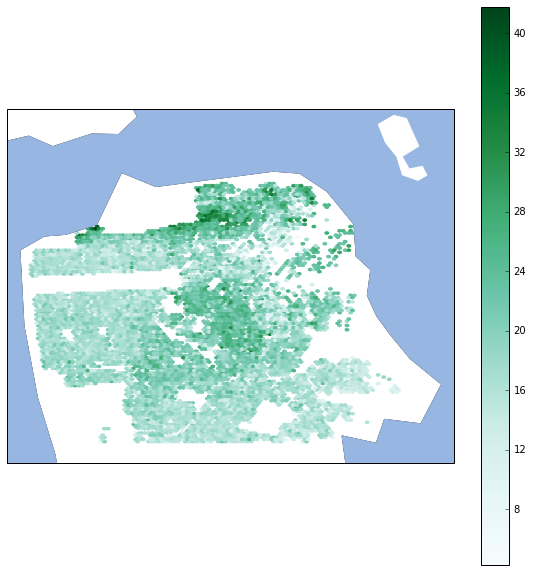

In [185]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())

COASTLINE = cartopy.feature.NaturalEarthFeature('physical', 'coastline', '10m', edgecolor='black', facecolor='none')
OCEAN     = cartopy.feature.NaturalEarthFeature('physical', 'ocean', '10m',
                            edgecolor='face',
                            facecolor=np.array((152, 183, 226)) / 256)
ax.add_feature(COASTLINE)
ax.add_feature(OCEAN)
ax.set_extent([-122.52, -122.35, 37.70, 37.835])

tmp = df_lv_clean

tmp.plot(x='X', y='Y', C='price', kind='hexbin', ax=ax, gridsize=(100,60))#, alpha=0.75)
#plt.colorbar()

plt.show()